
# Load images and preview with their fourier transformed image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.image import imread, imsave
# from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
import glob





In [2]:
def img2fft(img):
    fftimg=np.fft.fftshift(np.fft.fft2(img))
    abs_fftimg=np.log(np.abs(fftimg+1))
    return abs_fftimg

In [3]:
# np.arange(0,imageLength,.1)

Processing for freq=100
Processing for freq=200
Processing for freq=300
Processing for freq=400
Processing for freq=500
Processing for freq=600
Processing for freq=700
Processing for freq=800
Processing for freq=900


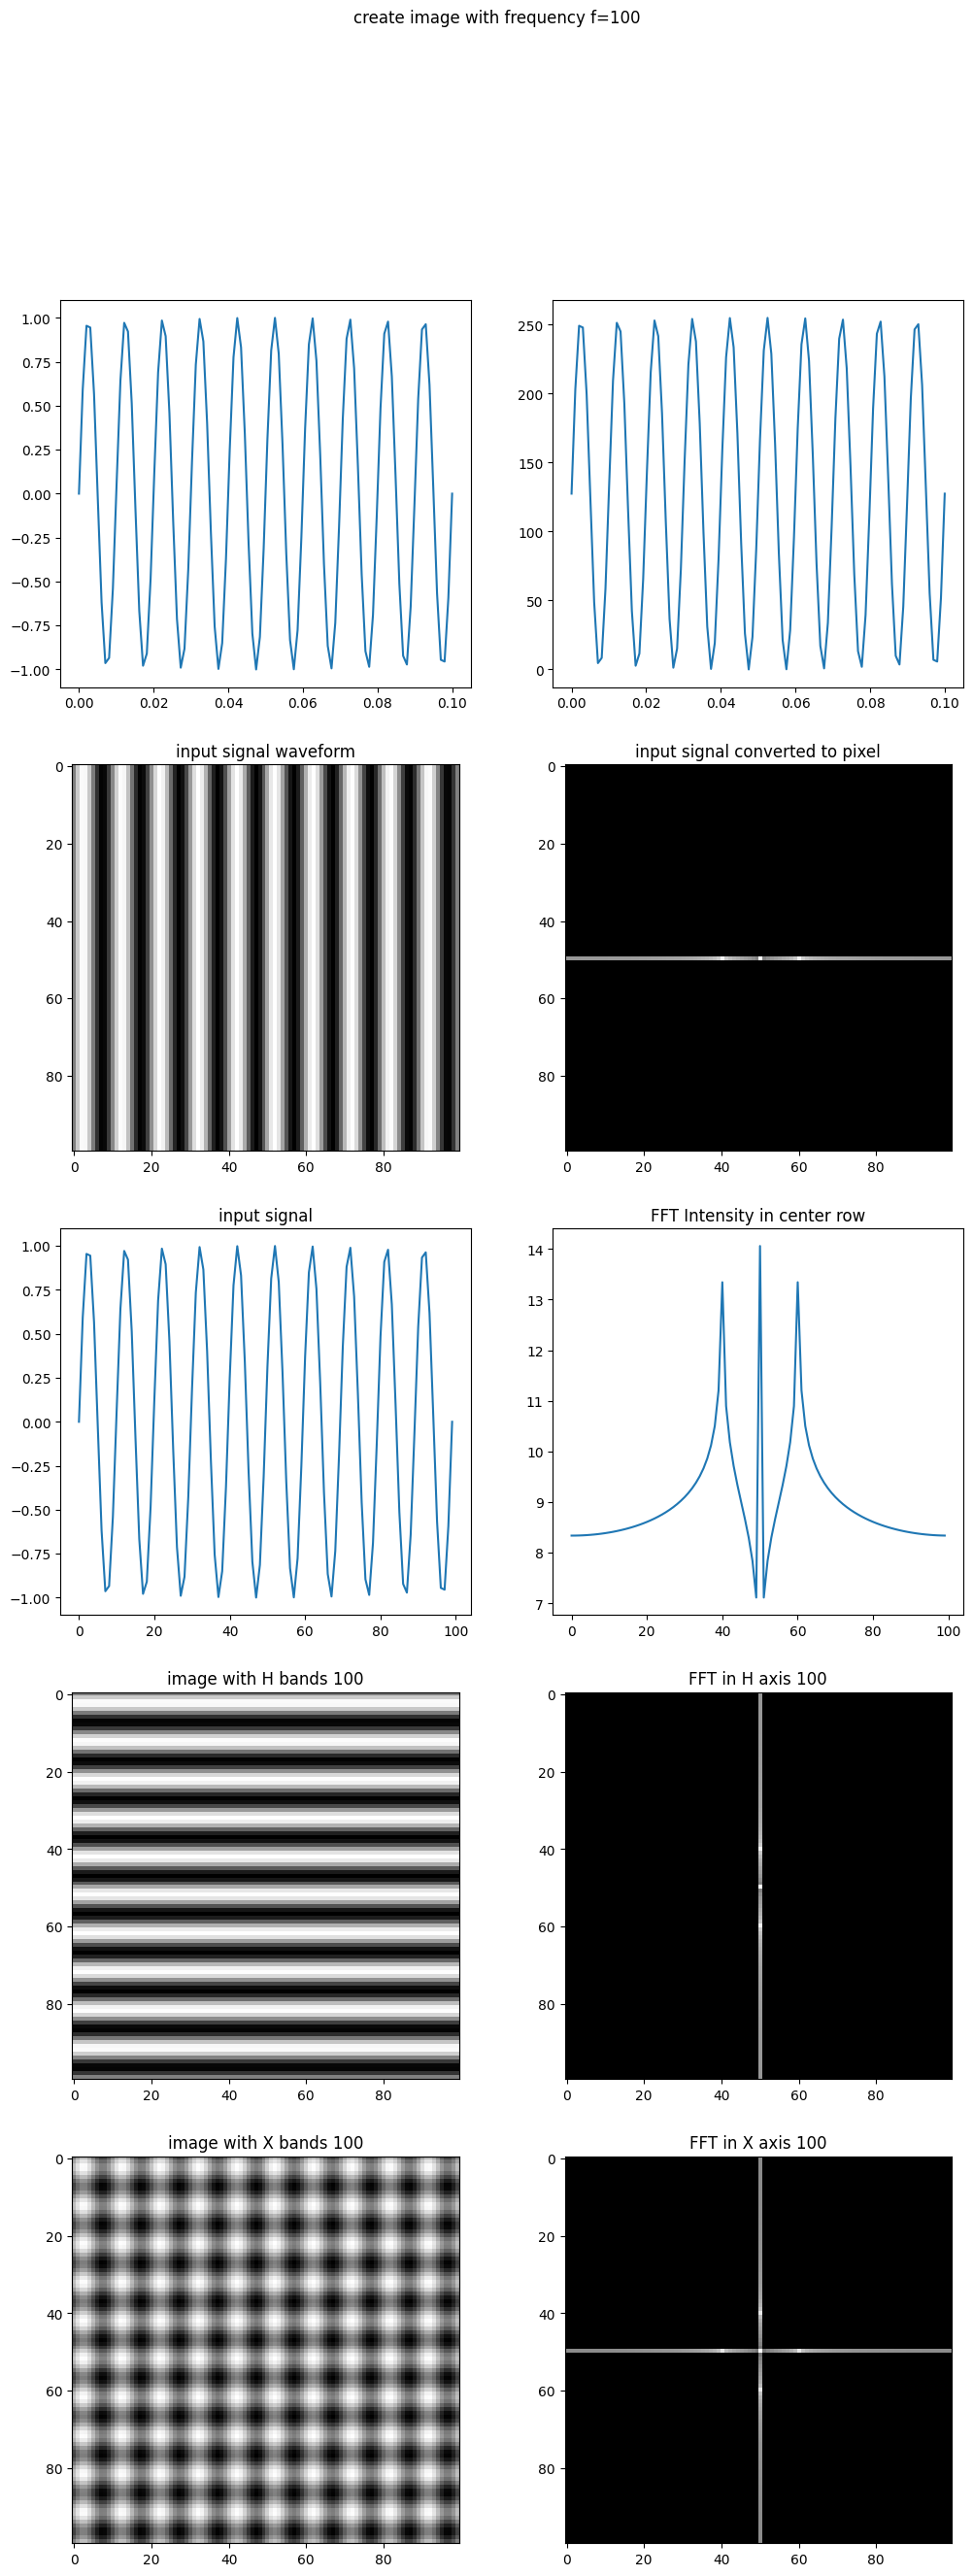

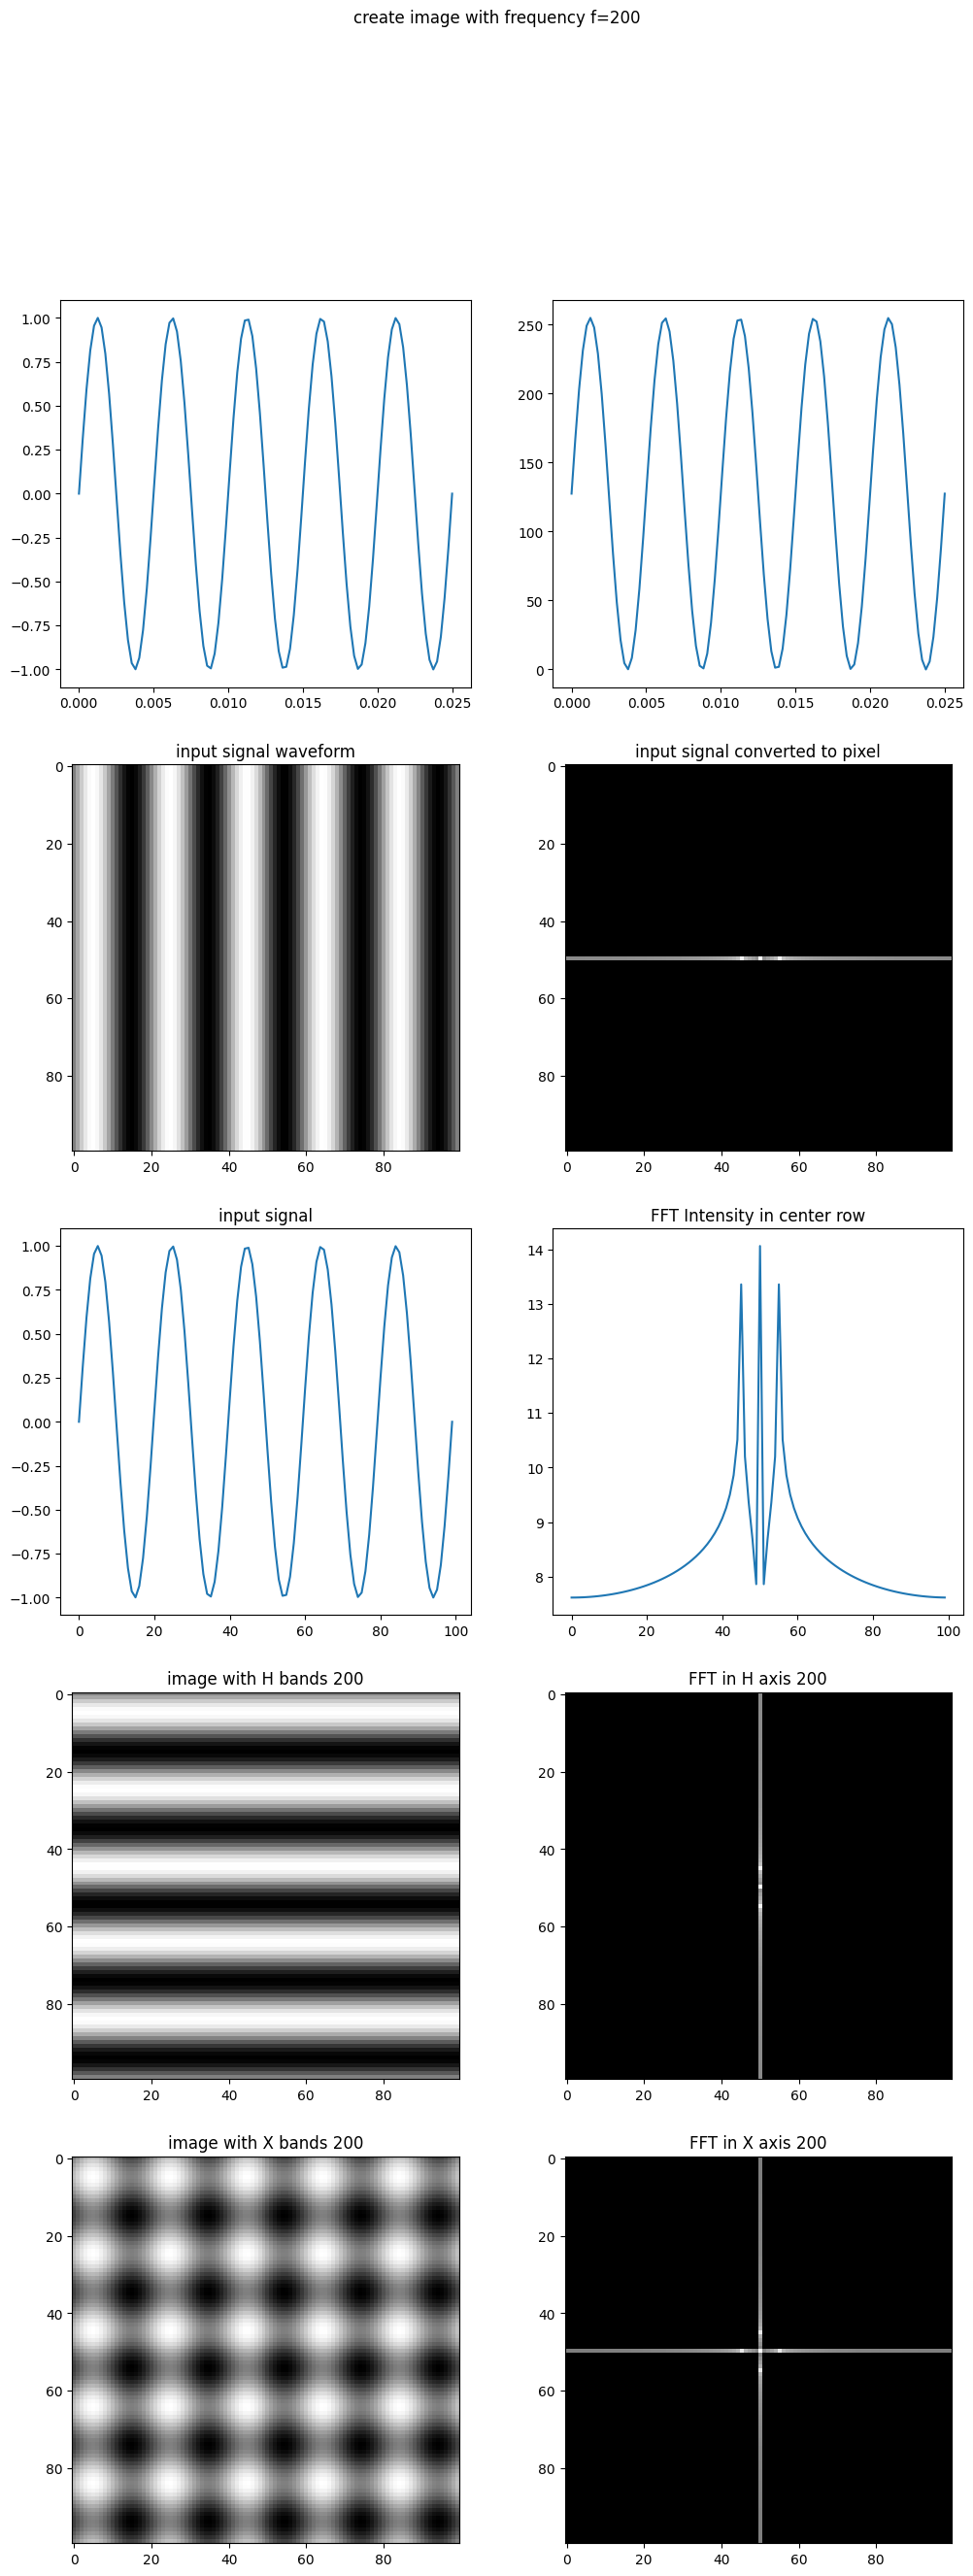

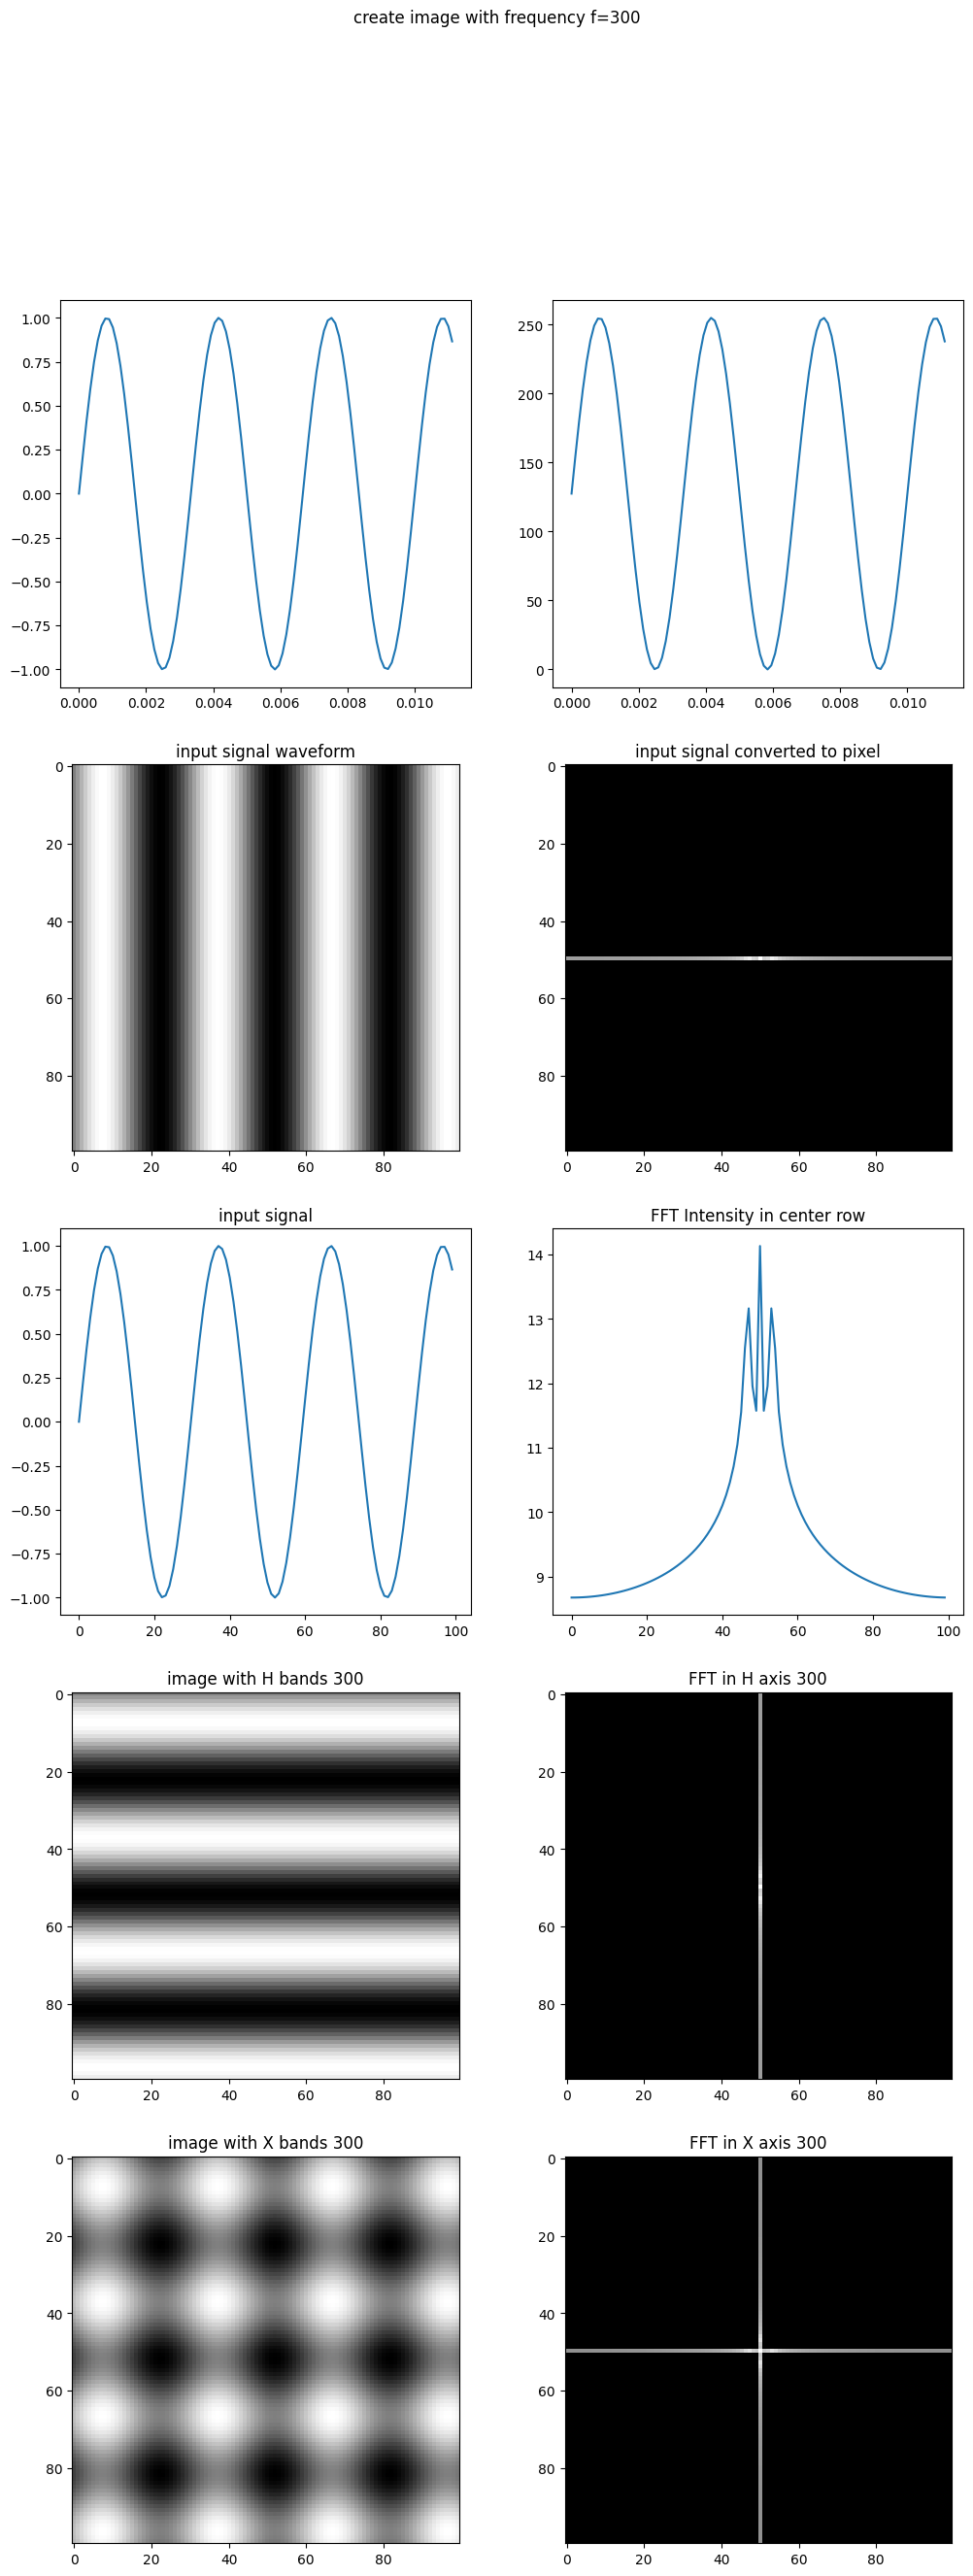

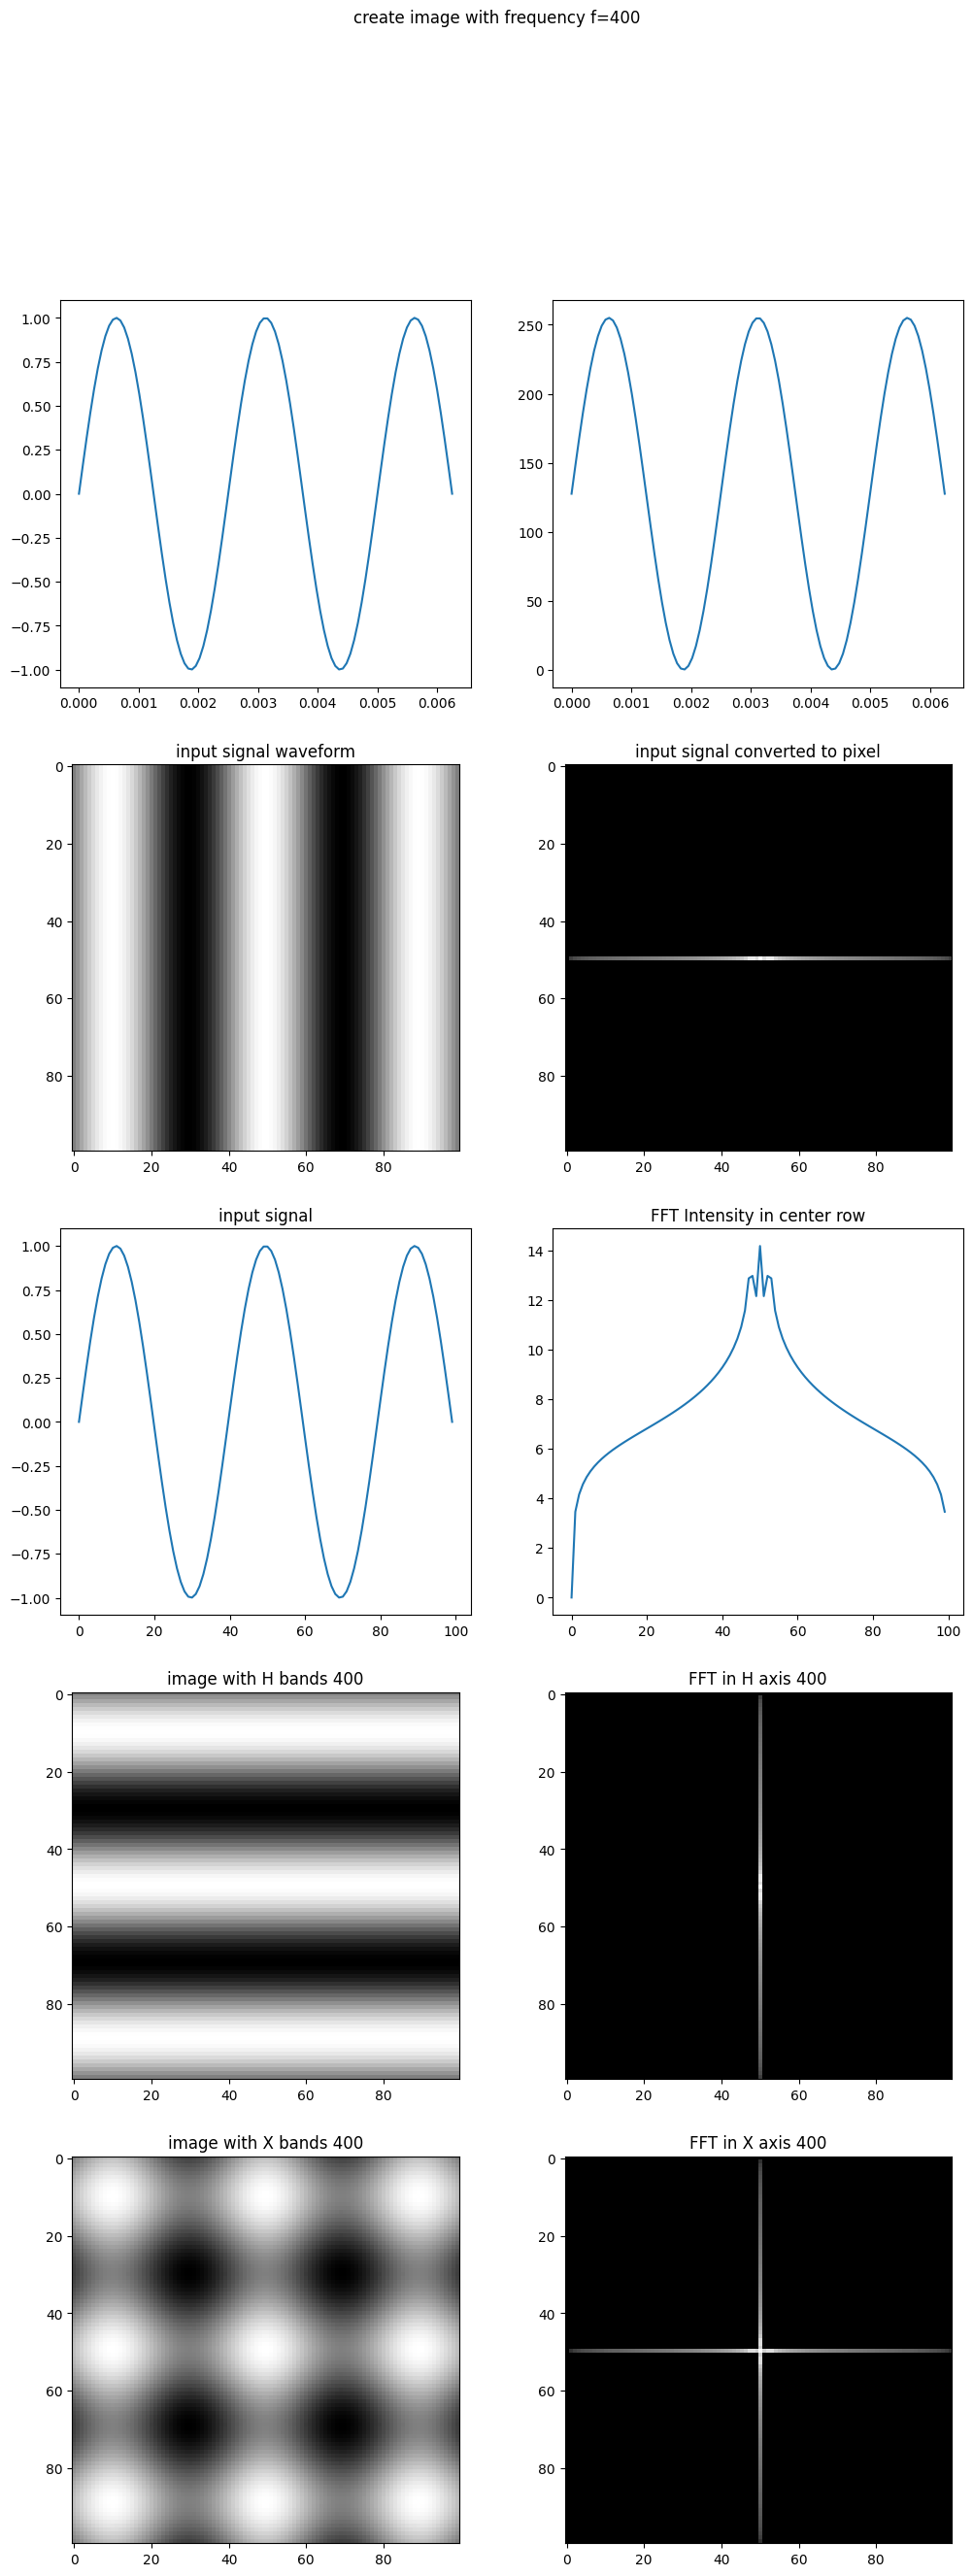

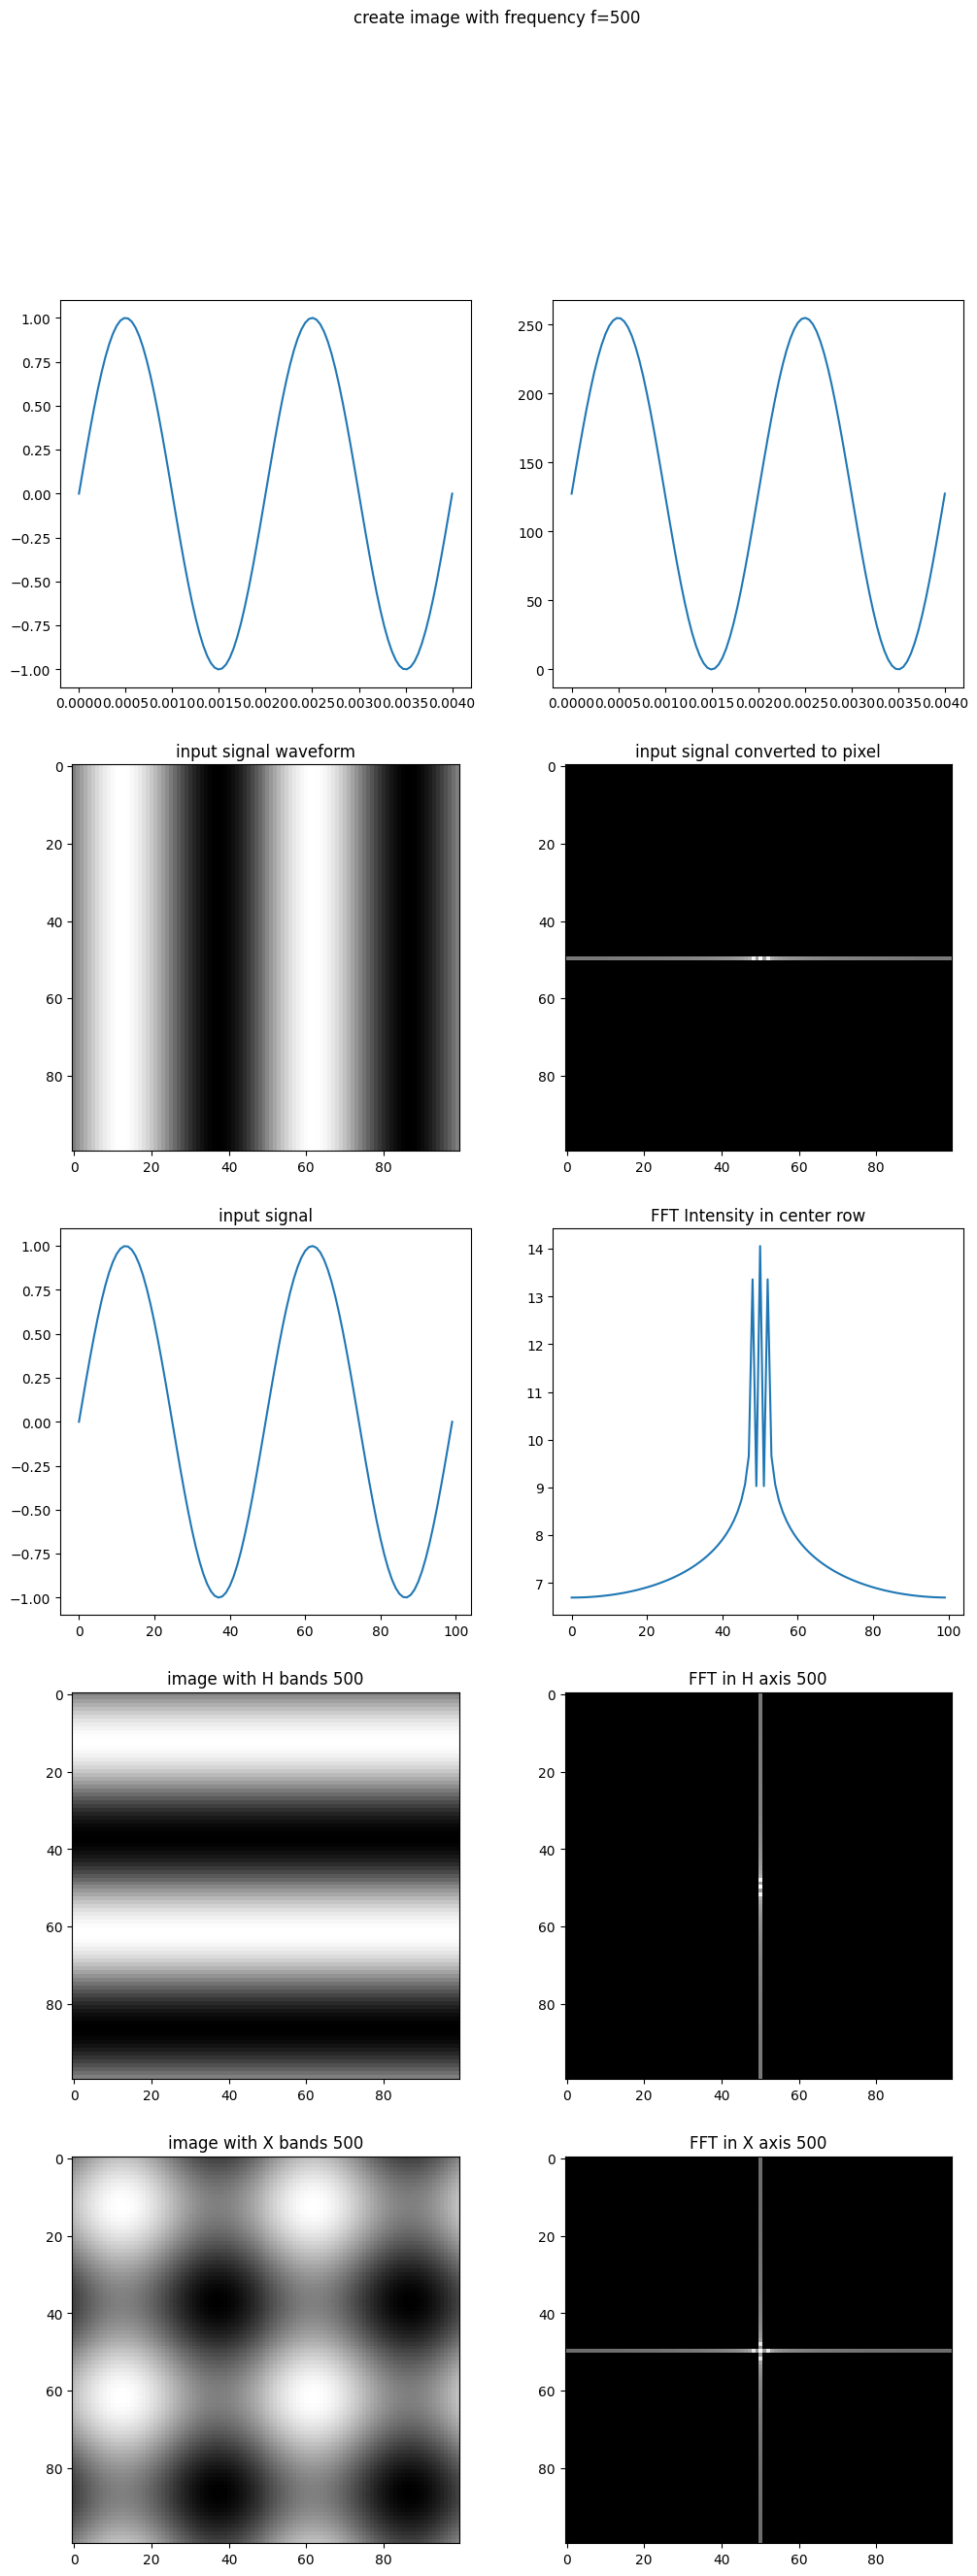

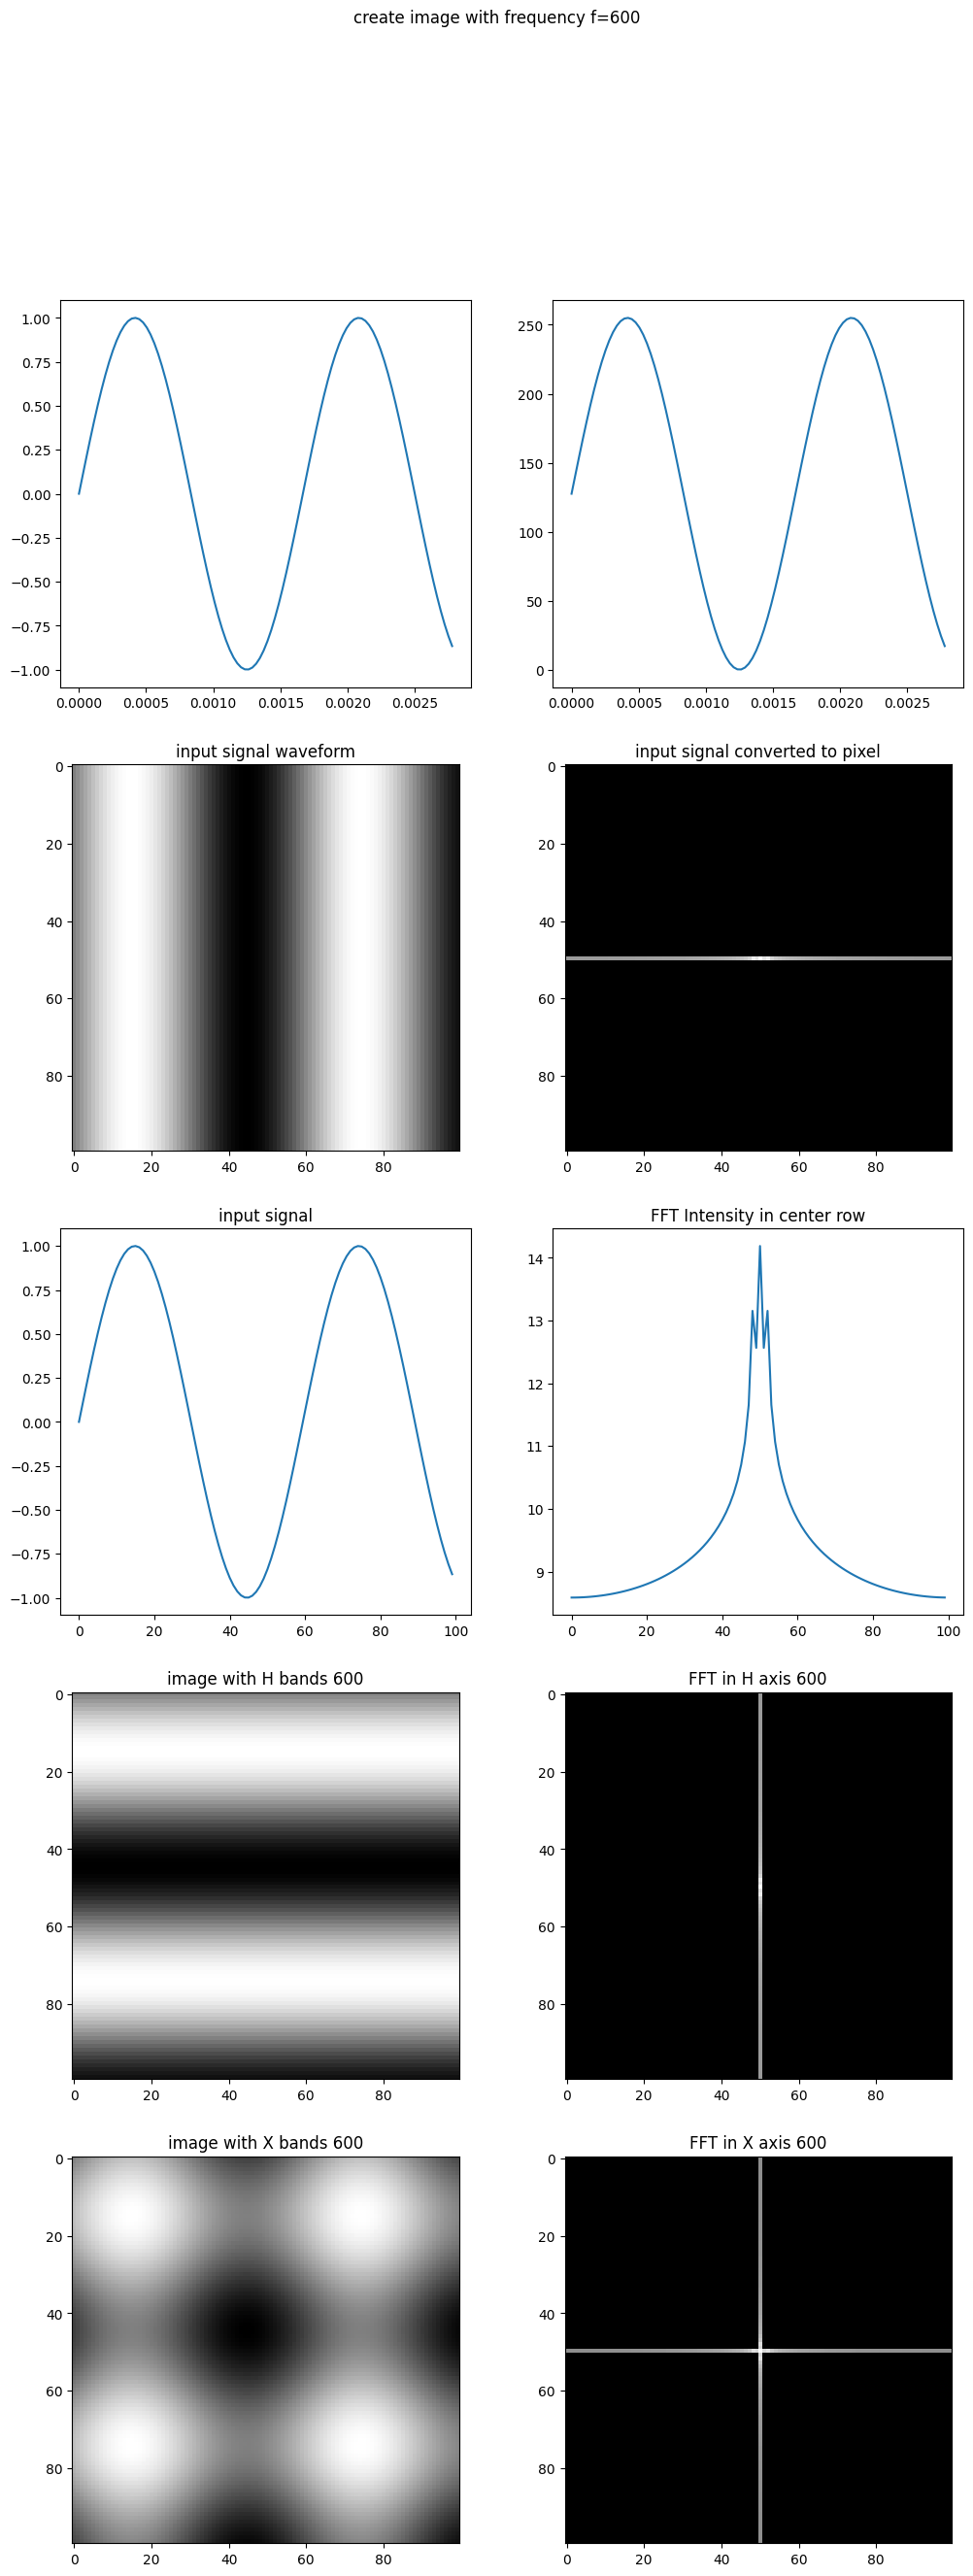

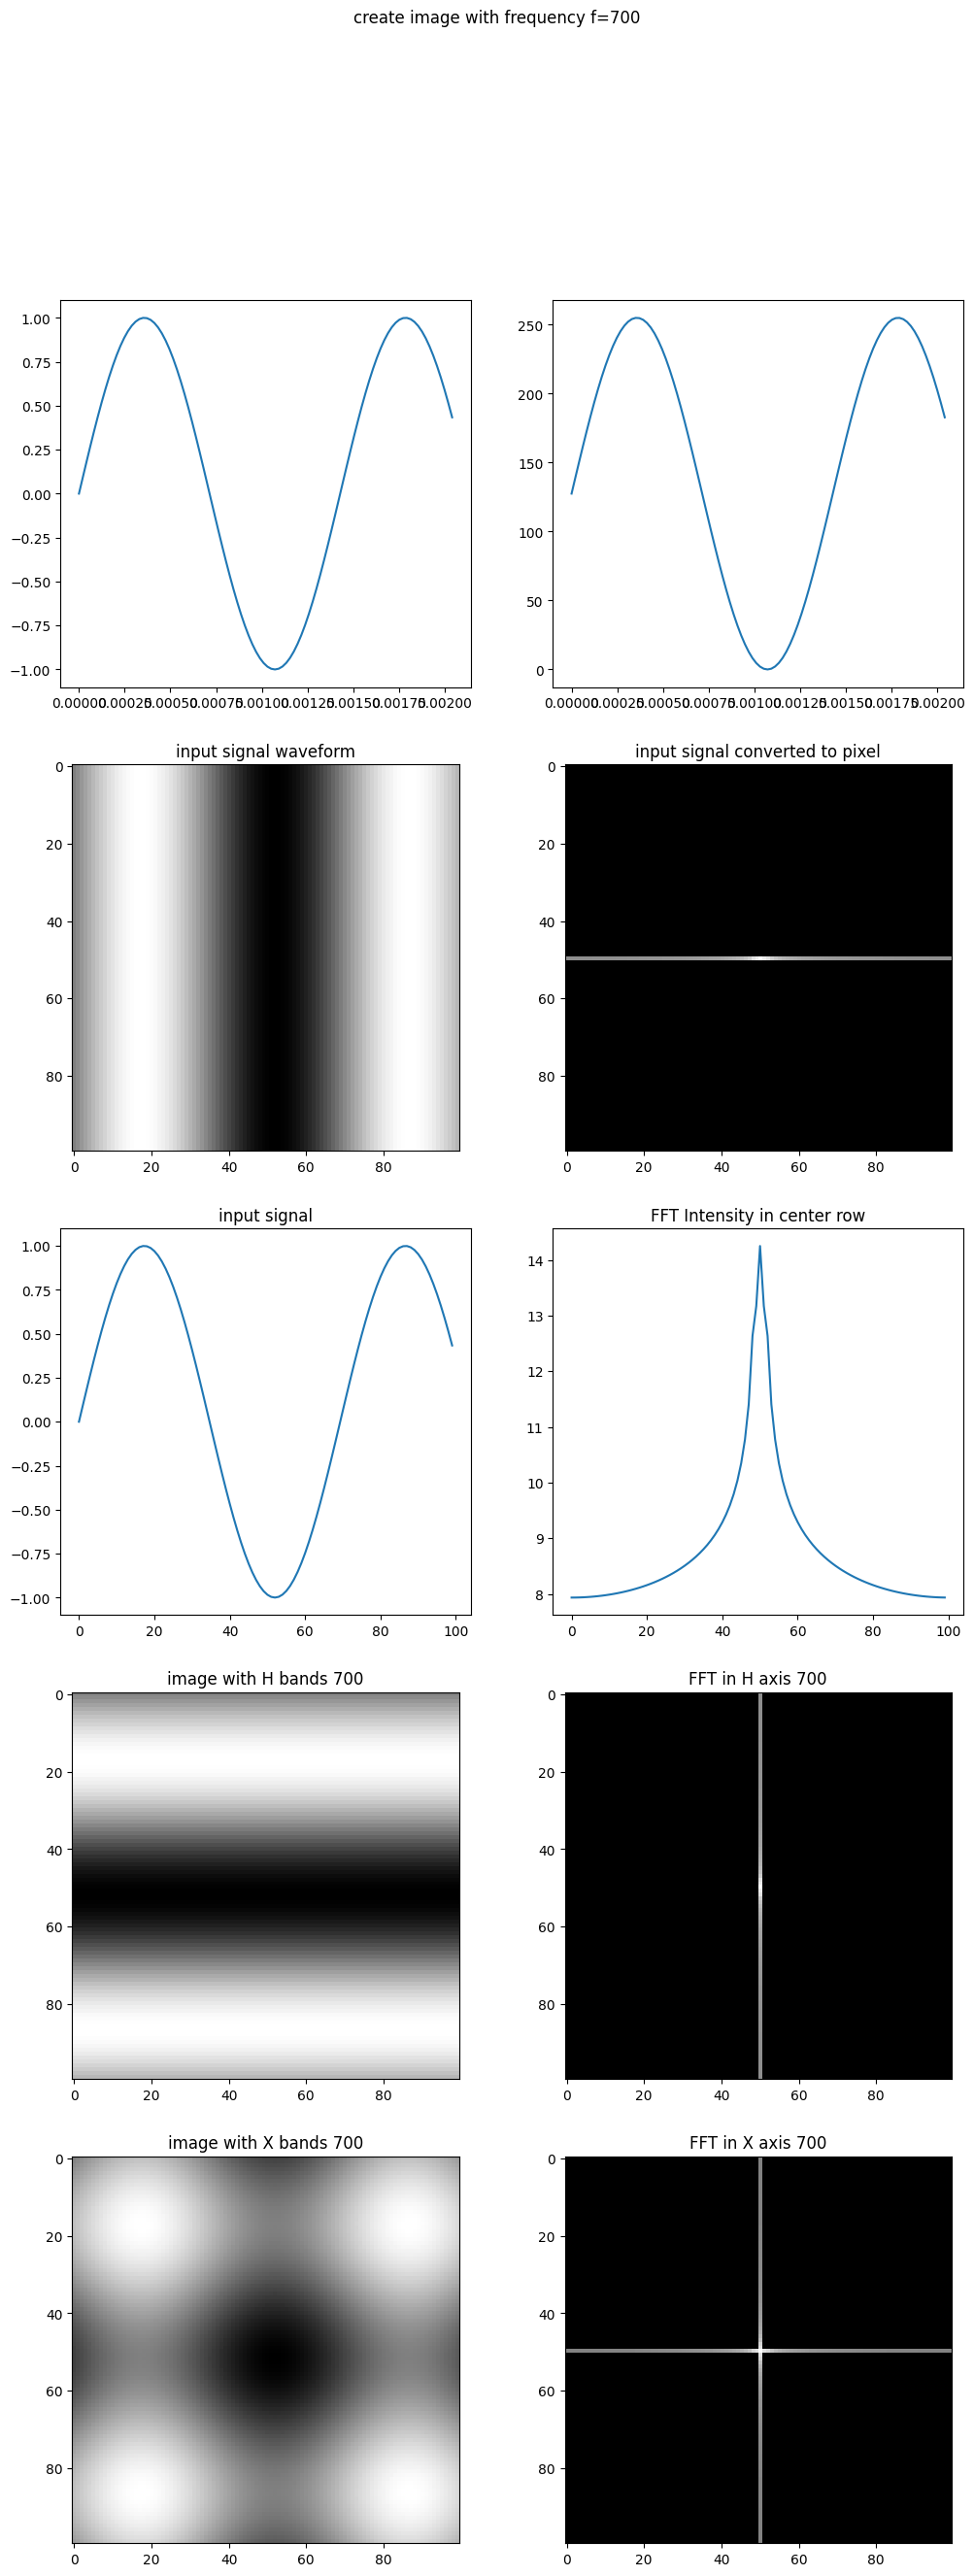

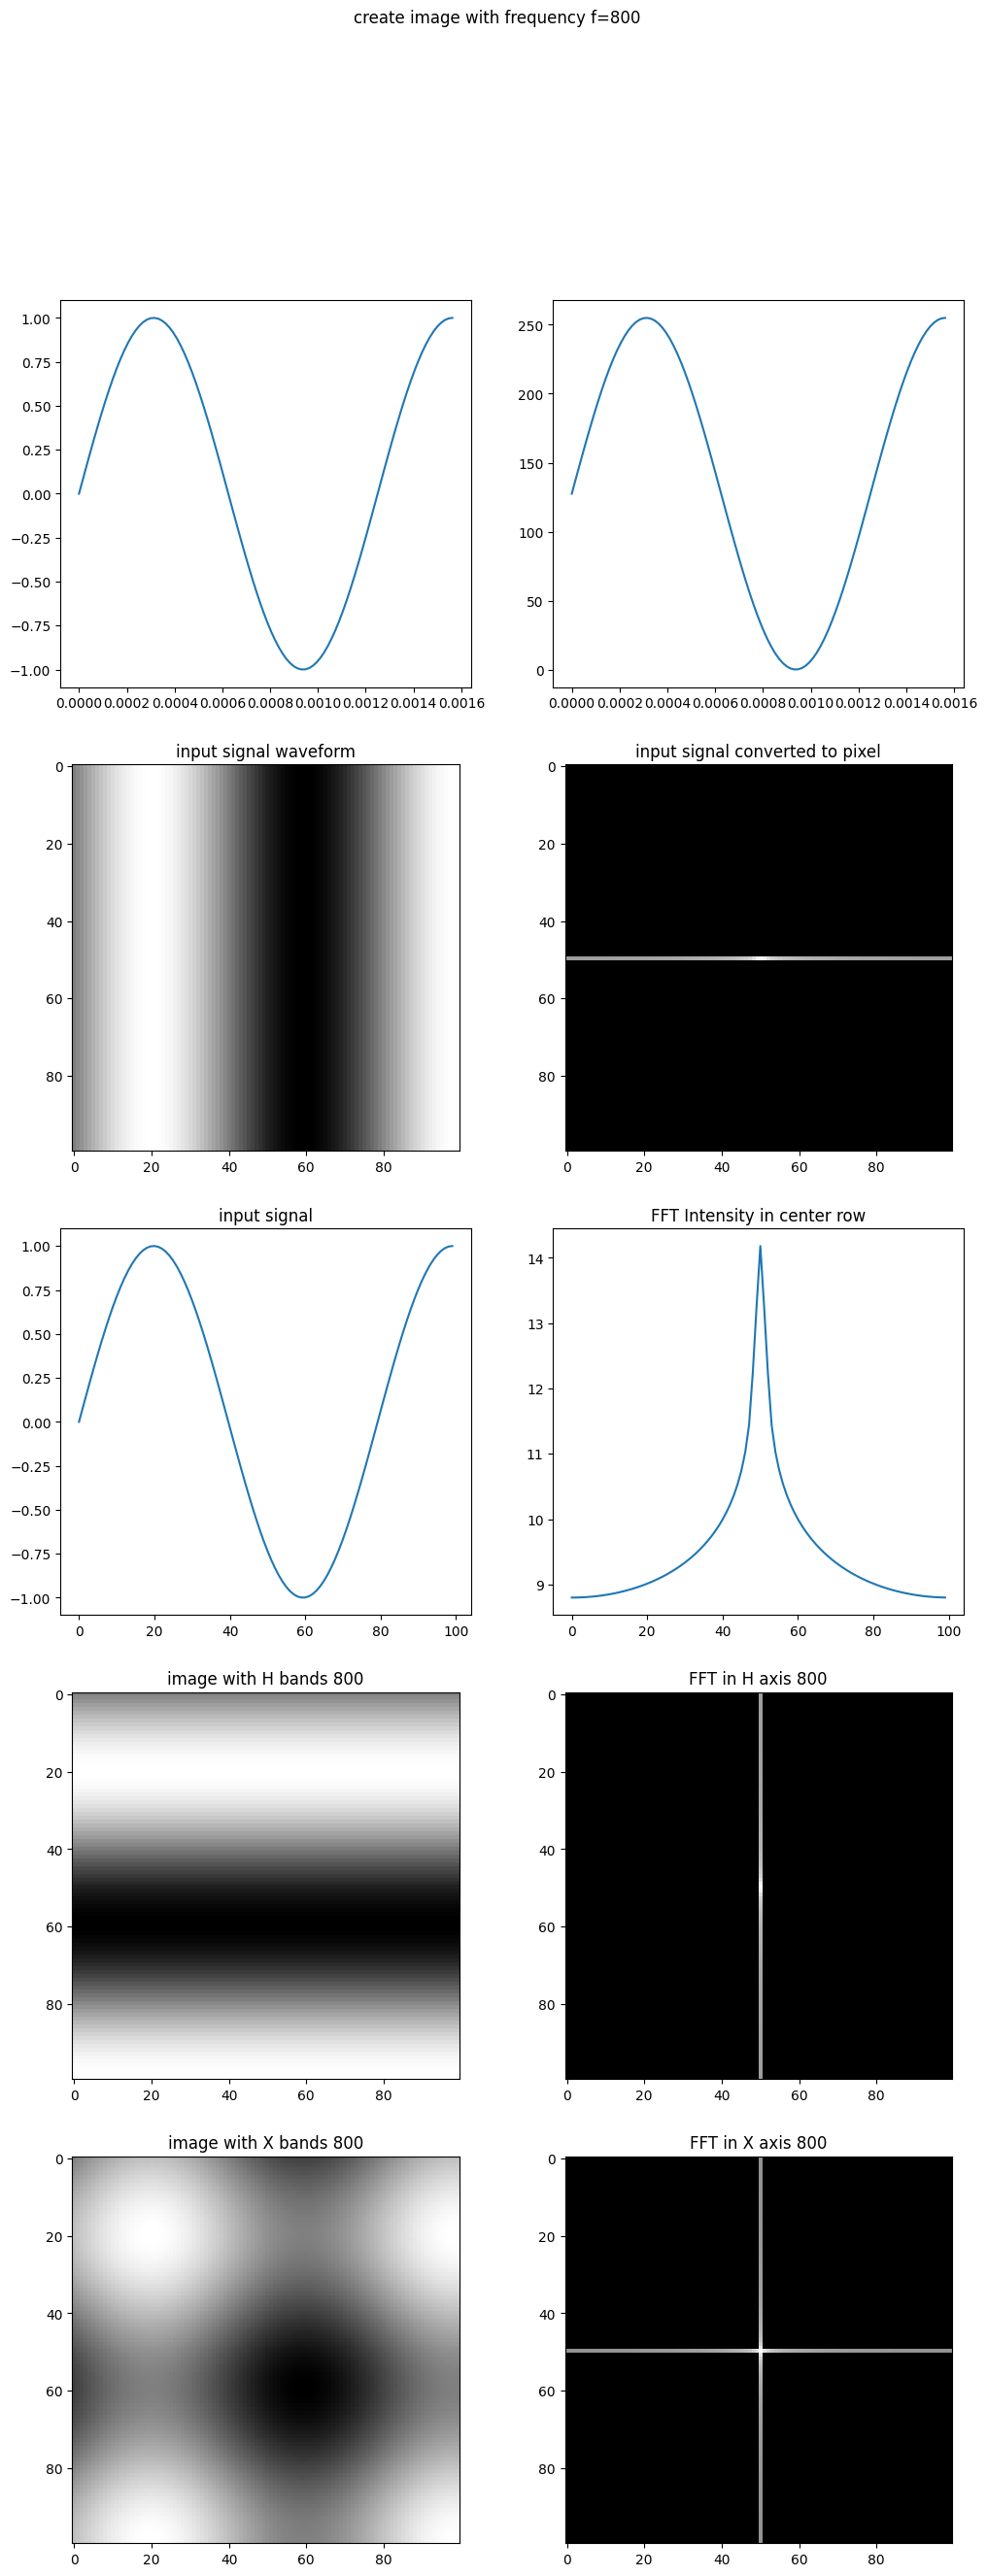

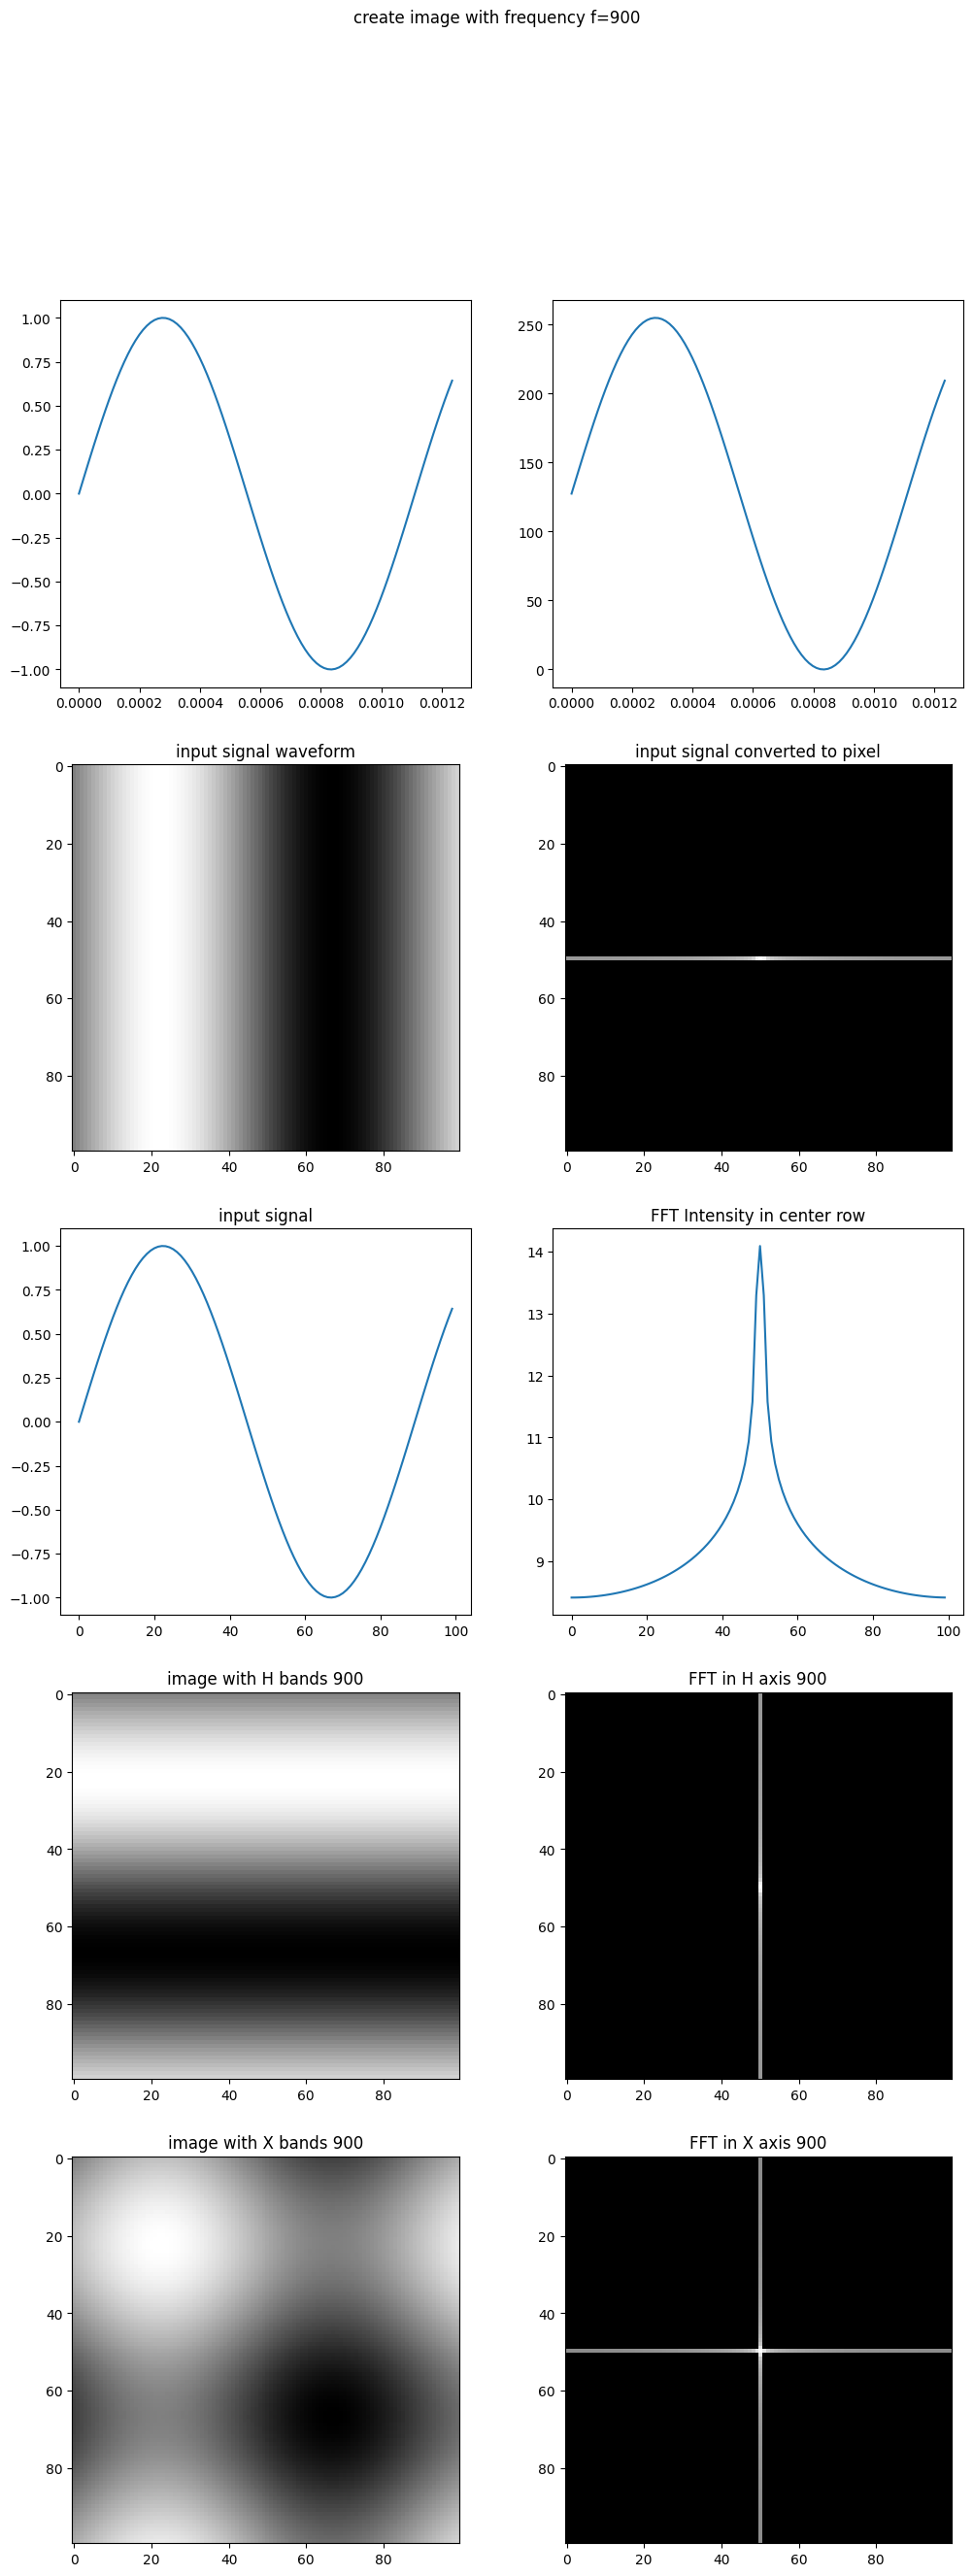

In [4]:
def generateImageWithFrequency(F=20):
    print(f"Processing for freq={F}")
    T=1/F
    w=2*np.pi*F
    cycles=1000/F
    imageLength=100
    t= np.linspace(0,cycles*T,imageLength)
    # t= np.arange(0,imageLength,.01)
    y=t
    x=np.sin(w*t)#signal
    fig,ax=plt.subplots(5,2,figsize=(12,30))
    fig.suptitle(f"create image with frequency f={F}")
    plotrow=0
    ax[plotrow,0].plot(y,x)

    pixelIntensity=(x+1)/2*255
    ax[plotrow,1].plot(y,pixelIntensity)
    # x


    #generate Dummy image
    plotrow+=1
    dummyImage=np.ones(imageLength**2,dtype=np.uint8).reshape(imageLength,imageLength)
    generatedImage=dummyImage*pixelIntensity
    ax[plotrow,0].imshow(generatedImage,cmap="gray")
    ax[plotrow,0].set_title(f"image with V bands {F}")
    ax[plotrow,0].set_title(f"input signal waveform")
    imsave(f"frequency={F}_V.png",generatedImage)

    fft_generatedImage=img2fft(generatedImage)
    ax[plotrow,1].imshow(fft_generatedImage,cmap="gray")
    ax[plotrow,1].set_title(f"FFT in V axis {F}")
    ax[plotrow,1].set_title(f"input signal converted to pixel")

    
    plotrow+=1
    ax[plotrow,0].plot(x)
    ax[plotrow,0].set_title(f"input signal")
    
    ax[plotrow,1].plot(fft_generatedImage[int(imageLength/2),:])
    ax[plotrow,1].set_title(f"FFT Intensity in center row")
    
    
    # rotate image
    plotrow+=1
    rotatedImage=generatedImage.T
    ax[plotrow,0].imshow(rotatedImage,cmap="gray")
    ax[plotrow,0].set_title(f"image with H bands {F}")
    imsave(f"frequency={F}_H.png",rotatedImage)

    
    
    fft_rotatedImage=img2fft(rotatedImage)
    ax[plotrow,1].imshow(fft_rotatedImage,cmap="gray")
    ax[plotrow,1].set_title(f"FFT in H axis {F}")
    
    
    # cross image
    plotrow+=1
    crossImage=(generatedImage+generatedImage.T)/2
    ax[plotrow,0].imshow(crossImage,cmap="gray")
    ax[plotrow,0].set_title(f"image with X bands {F}")
    imsave(f"frequency={F}_X.png",crossImage)

    
    
    fft_crossImage=img2fft(crossImage)
    ax[4,1].imshow(fft_crossImage,cmap="gray")
    ax[4,1].set_title(f"FFT in X axis {F}")
    
    
    return generatedImage,[fft_generatedImage,fft_rotatedImage,fft_crossImage]
    
FFT=[]
G=[]
for f in np.arange(100,1000,100):
    x=generateImageWithFrequency(f)
    g=x[0]
    f=x[1]
    G.append(g)
    FFT.append(f)

# FFT Interpretation
by plotting different rows of fft image it can be observed that

## It has two major components 
### one at the center representing dc value or average intensity
### and other the major component of frequency at right (with its mirror in the left)

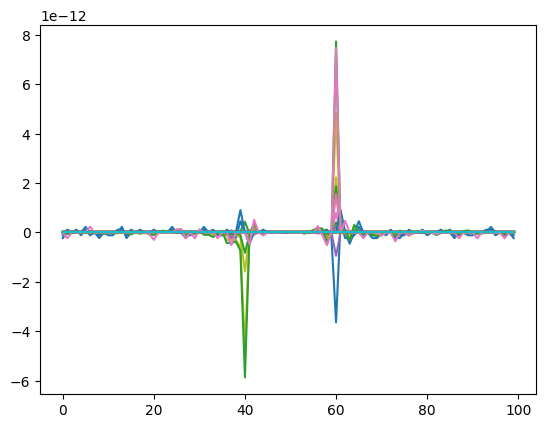

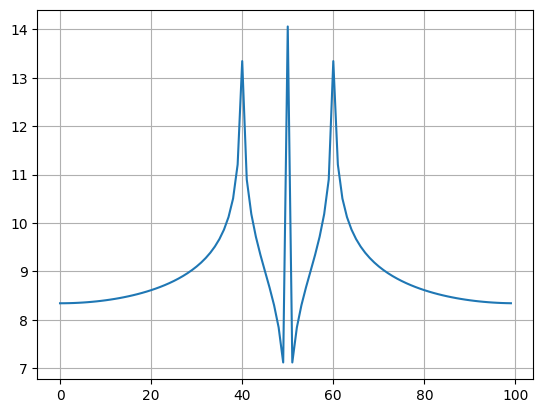

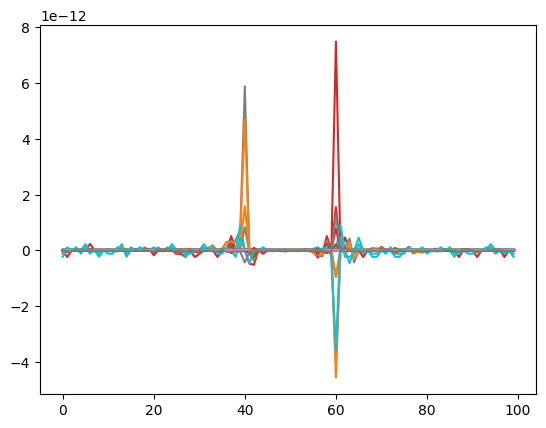

In [5]:
fft_generatedImage=FFT[0][0]
plt.figure()
for i in range(0,50):
    fftRow=fft_generatedImage[i,:]
    plt.plot(fftRow)
    plt.hold='on'
    plt.grid()
    
    
plt.figure()
for i in range(50,51):
    fftRow=fft_generatedImage[i,:]
    plt.plot(fftRow)
    plt.hold='on'
    plt.grid()
    plt.title="fft in the center row"
    
plt.figure()
for i in range(51,99):
    fftRow=fft_generatedImage[i,:]
    plt.plot(fftRow)
    plt.hold='on'
    plt.grid()

# fft_generatedImage[50,:]

# Read images starting with f

In [6]:

images=glob.glob("f*.png")
images=np.sort(images)
images

array(['frequency=100_H.png', 'frequency=100_V.png',
       'frequency=100_X.png', 'frequency=200_H.png',
       'frequency=200_V.png', 'frequency=200_X.png',
       'frequency=300_H.png', 'frequency=300_V.png',
       'frequency=300_X.png', 'frequency=400_H.png',
       'frequency=400_V.png', 'frequency=400_X.png',
       'frequency=500_H.png', 'frequency=500_V.png',
       'frequency=500_X.png', 'frequency=600_H.png',
       'frequency=600_V.png', 'frequency=600_X.png',
       'frequency=700_H.png', 'frequency=700_V.png',
       'frequency=700_X.png', 'frequency=800_H.png',
       'frequency=800_V.png', 'frequency=800_X.png',
       'frequency=900_H.png', 'frequency=900_V.png',
       'frequency=900_X.png'], dtype='<U19')

In [7]:
def show_fft(imgName):
    img=imread(imgName)
    img=img[:,:,:3]
    img = rgb2gray(img)
    fig,ax=plt.subplots(1,2,figsize=(10, 5))
    fig.suptitle(f"Fig: {imgName}")
    ax[0].imshow(img, cmap='gray');
    ax[0].set_title("orignal image")
    
    fftimg=np.fft.fftshift(np.fft.fft2(img))
    abs_fftimg=np.log(np.abs(fftimg+1))
    ax[1].imshow(abs_fftimg, cmap='gray');
    ax[1].set_title("Fourier transform")
    

/tmp/ipykernel_73320/4198928185.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(1,2,figsize=(10, 5))


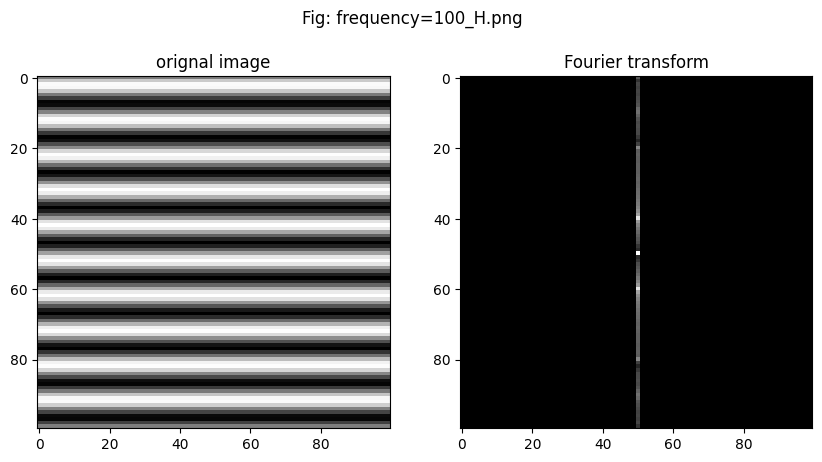

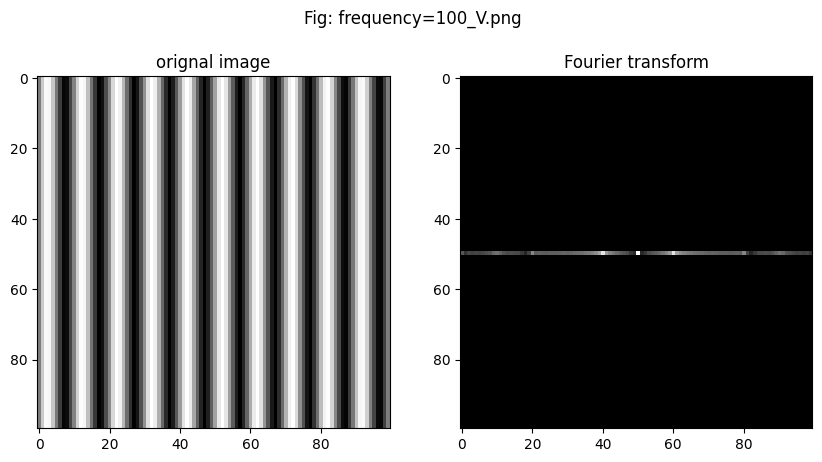

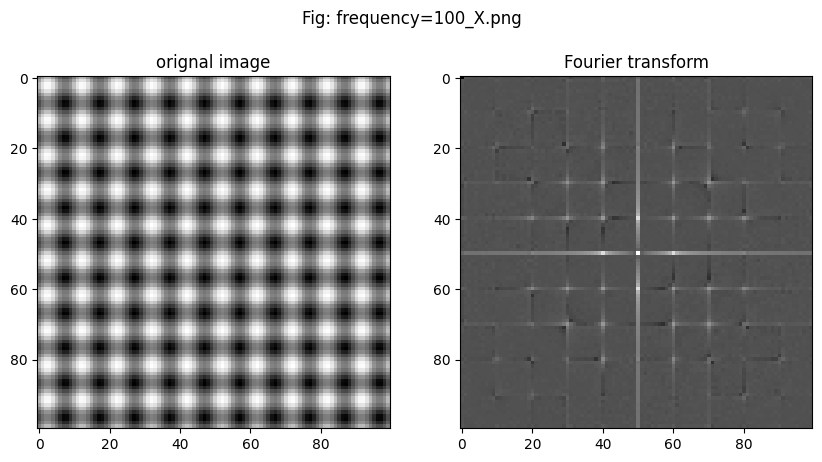

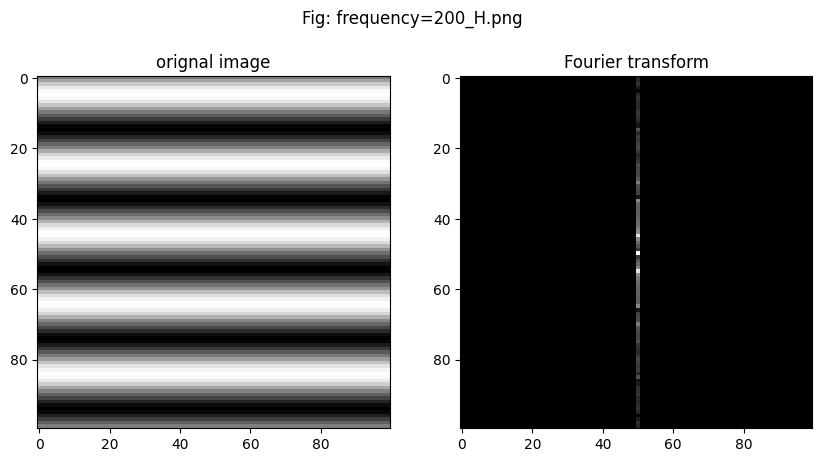

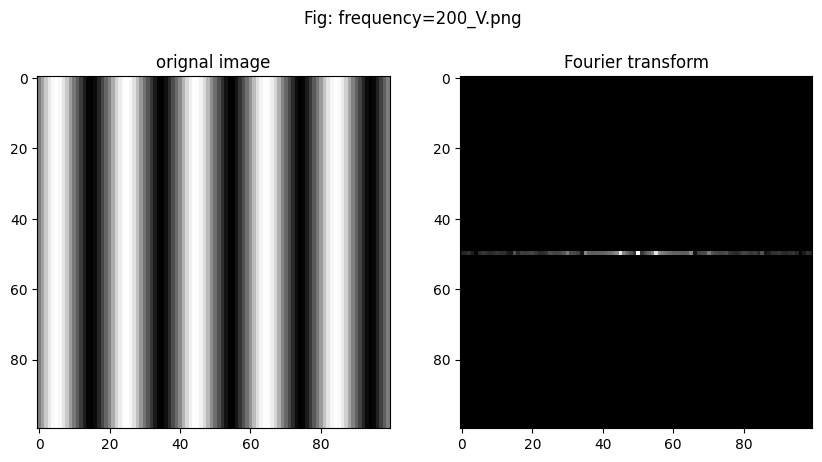

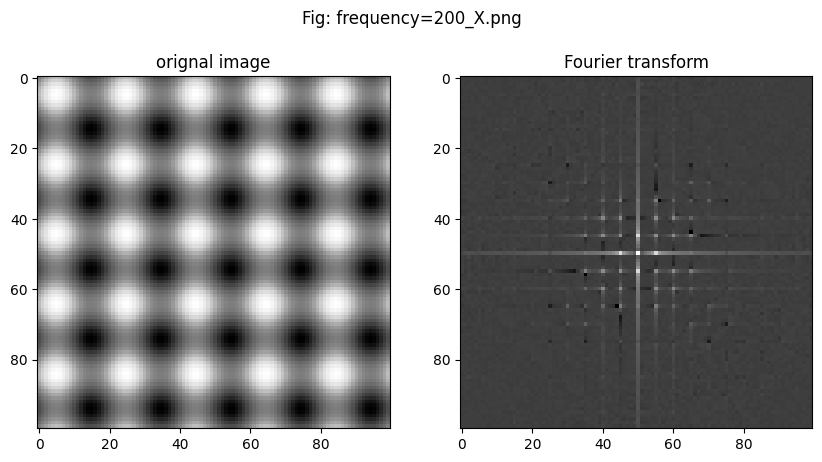

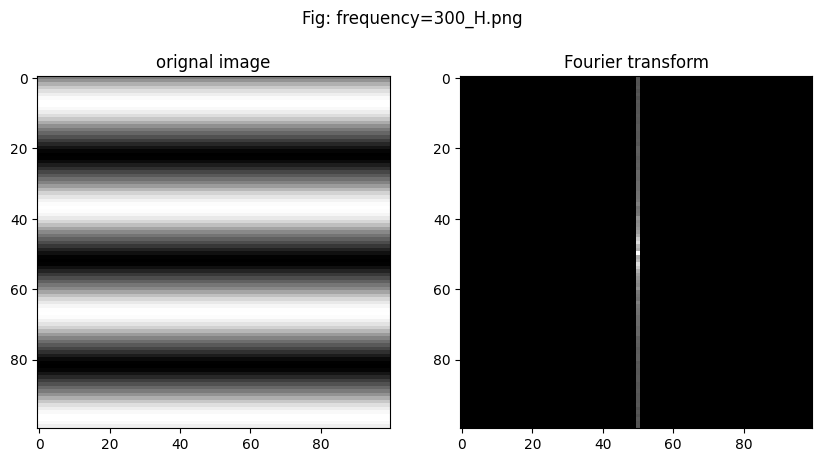

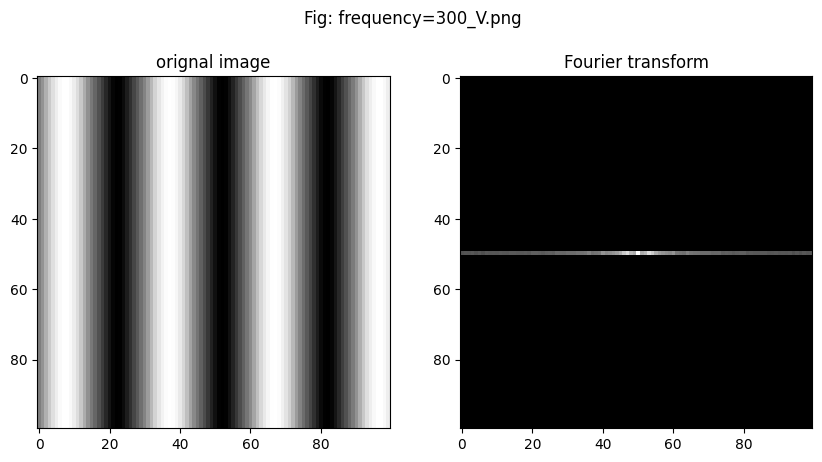

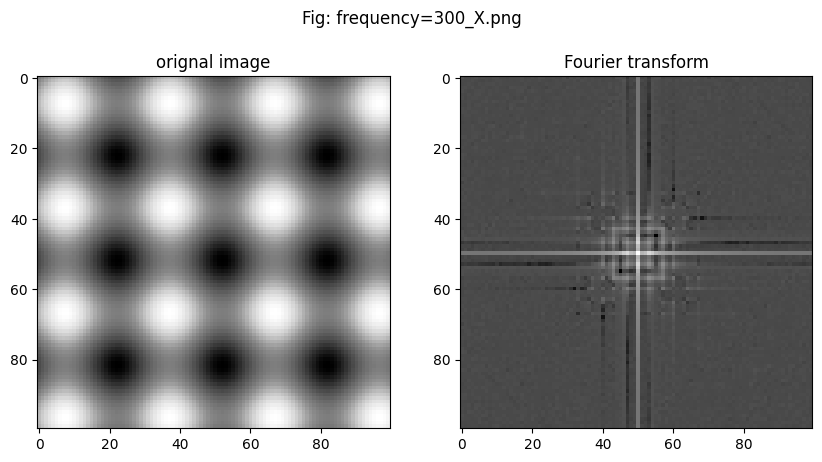

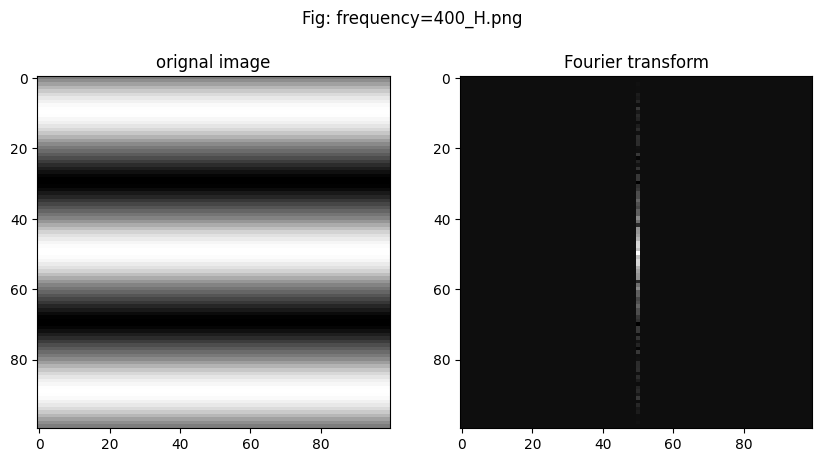

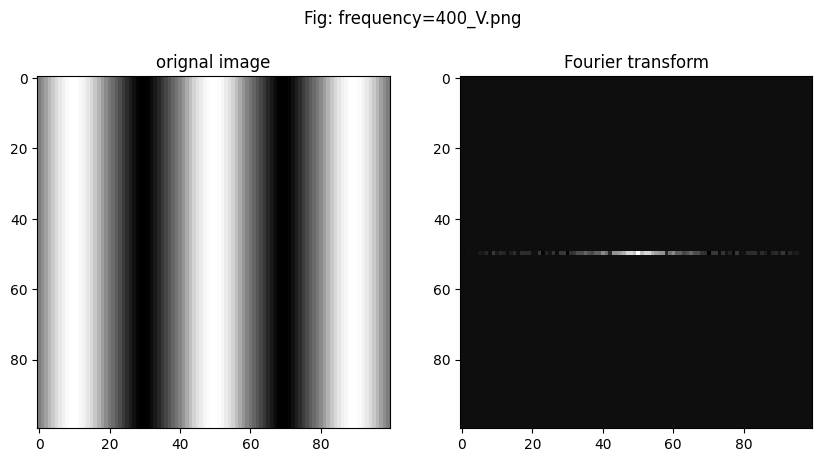

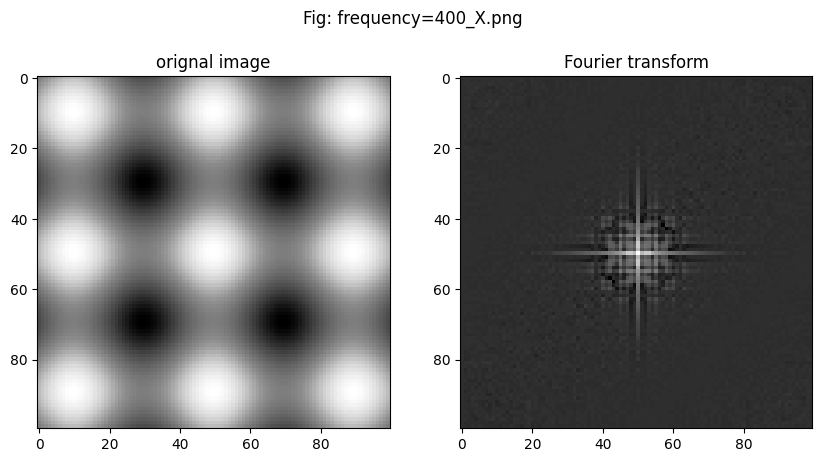

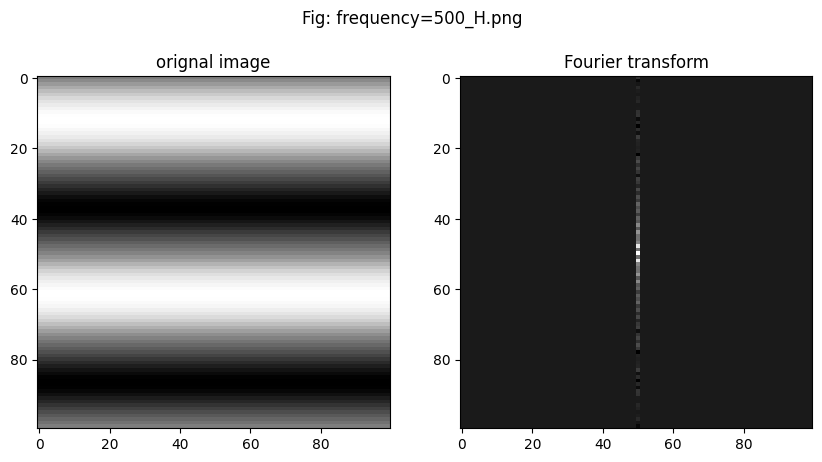

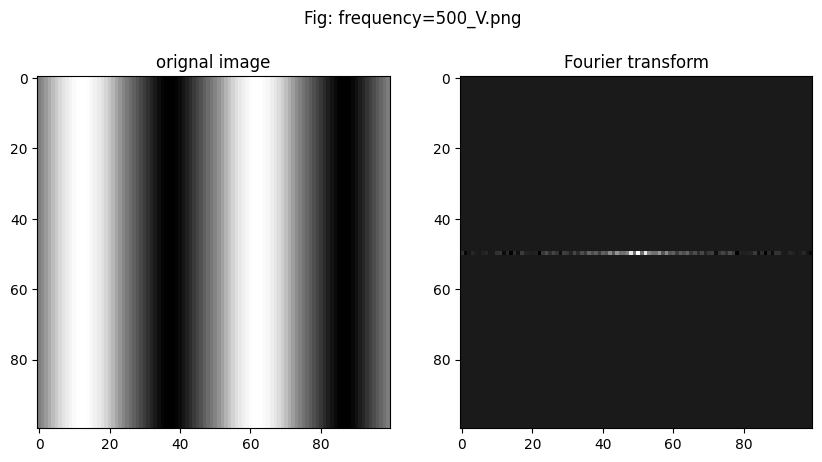

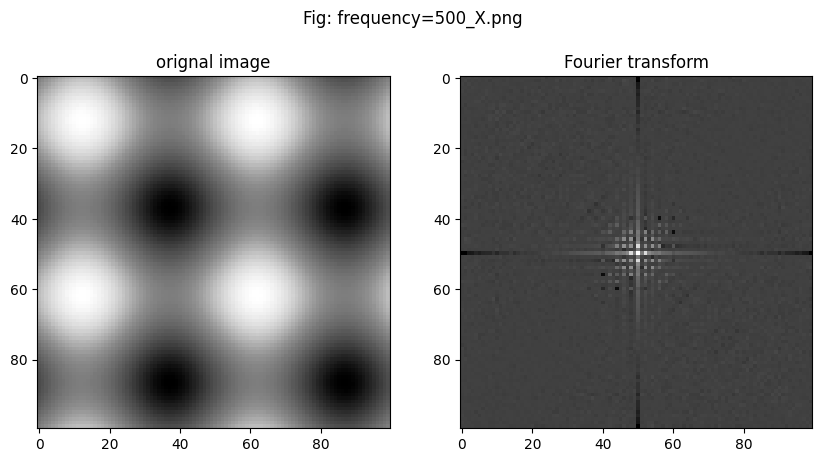

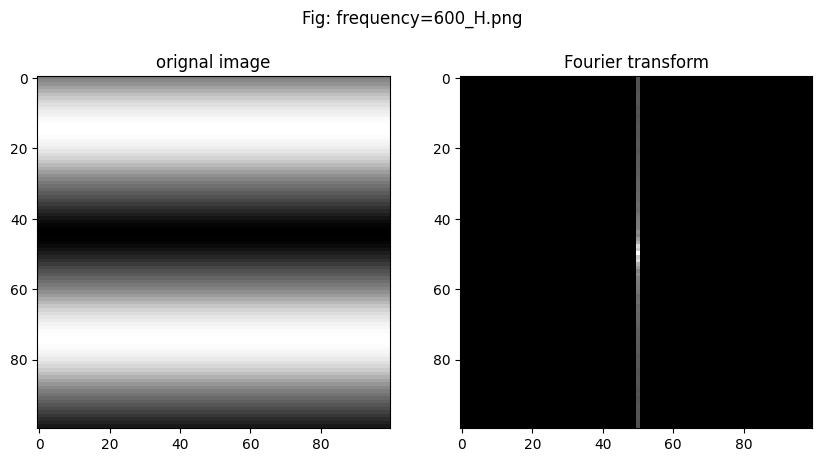

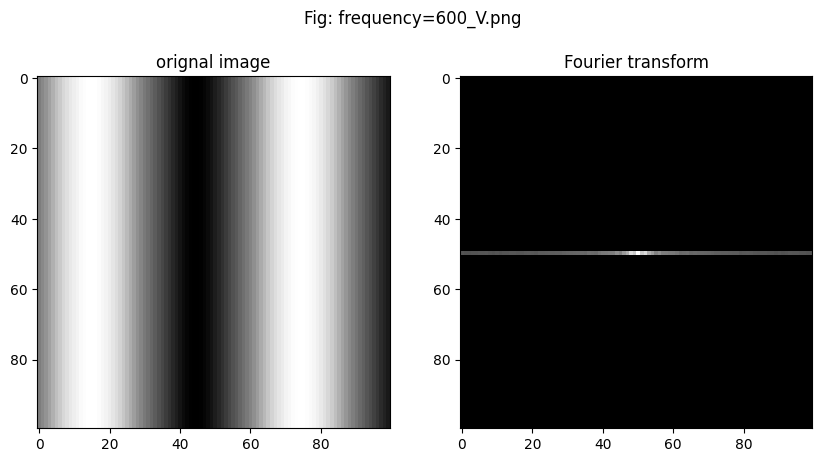

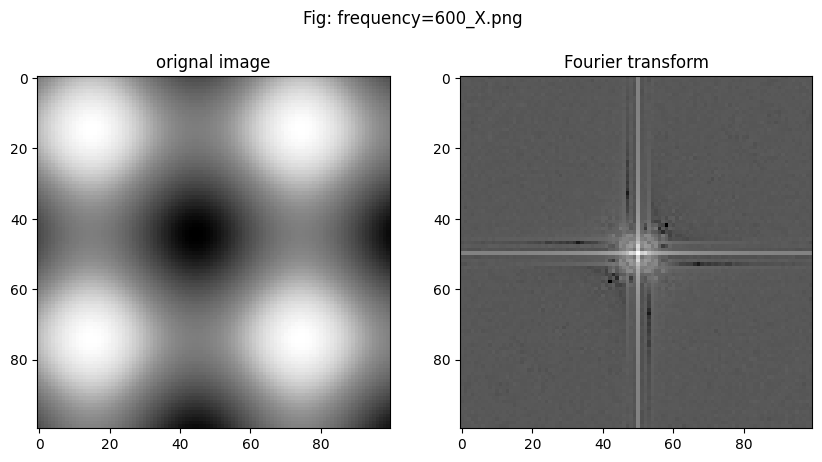

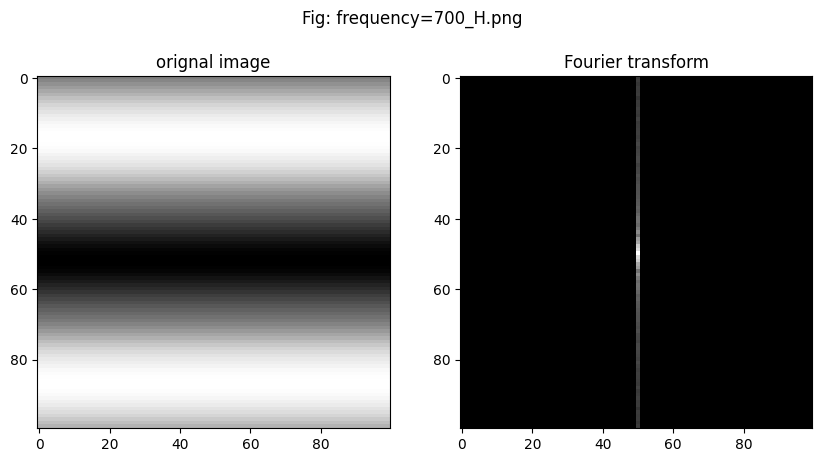

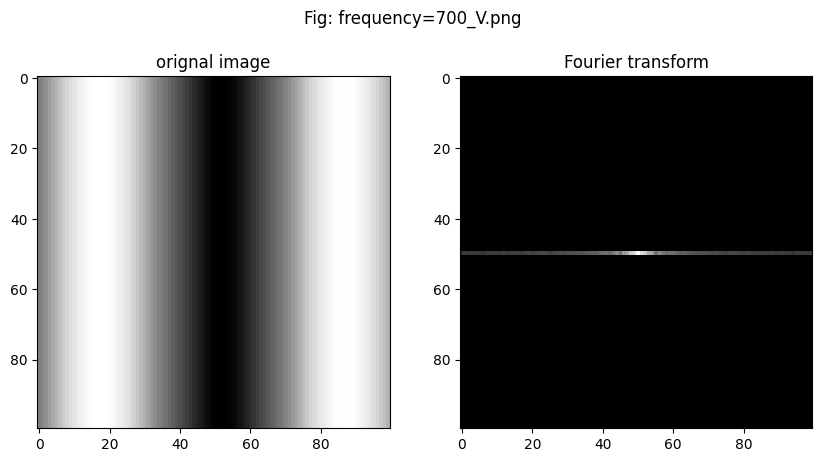

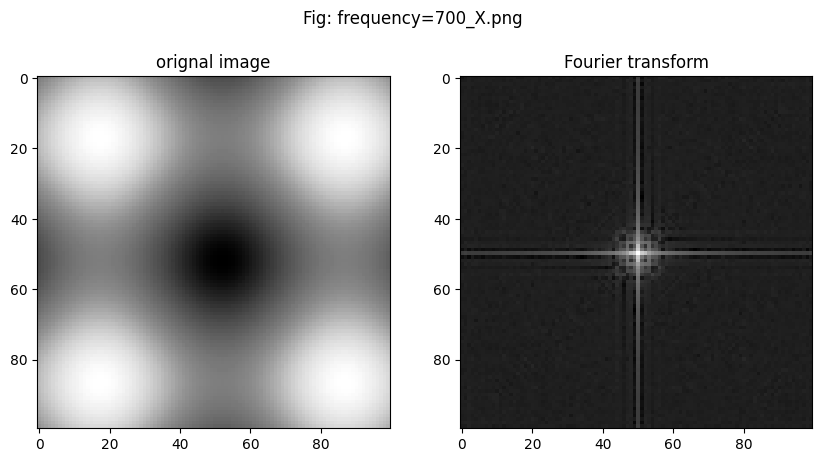

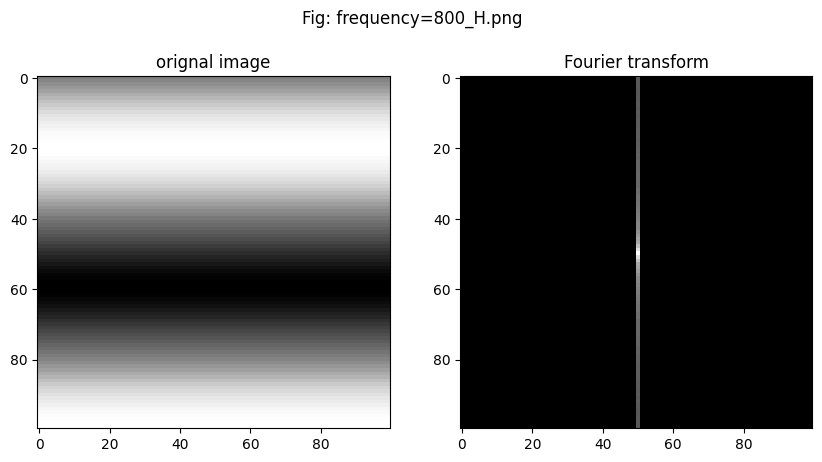

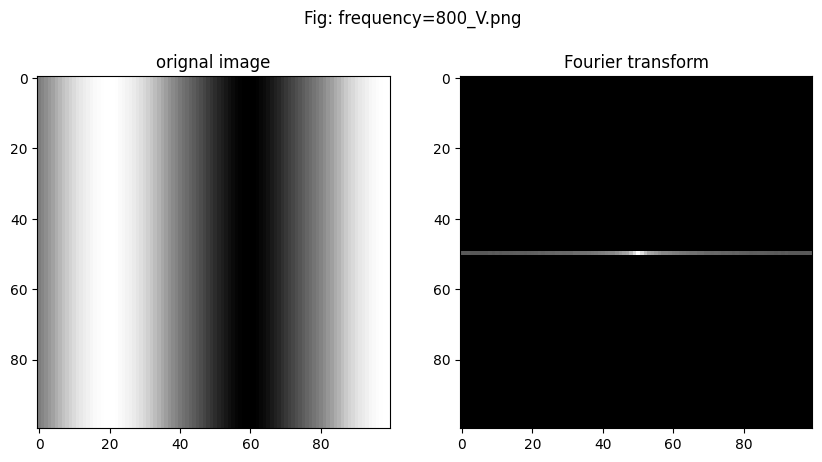

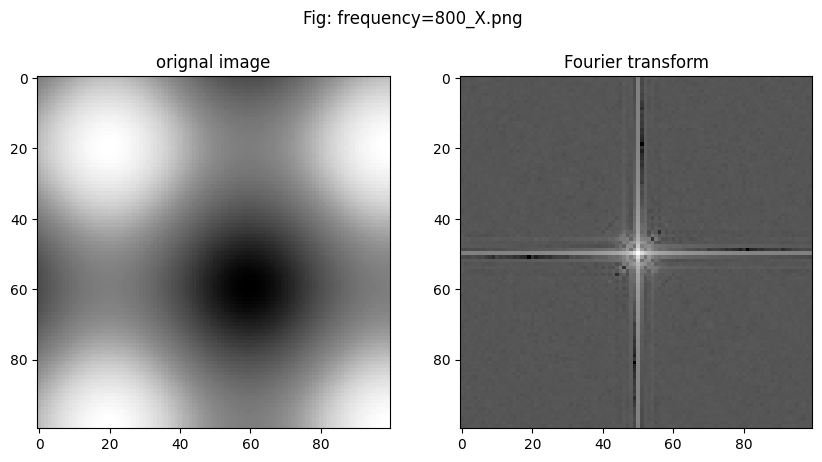

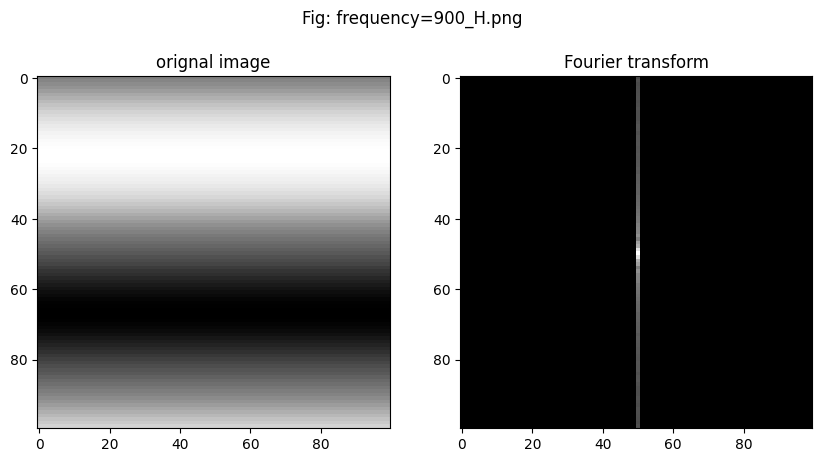

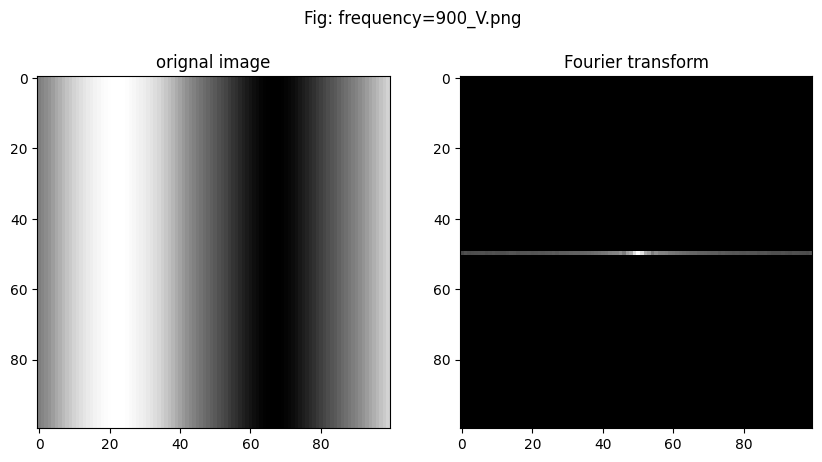

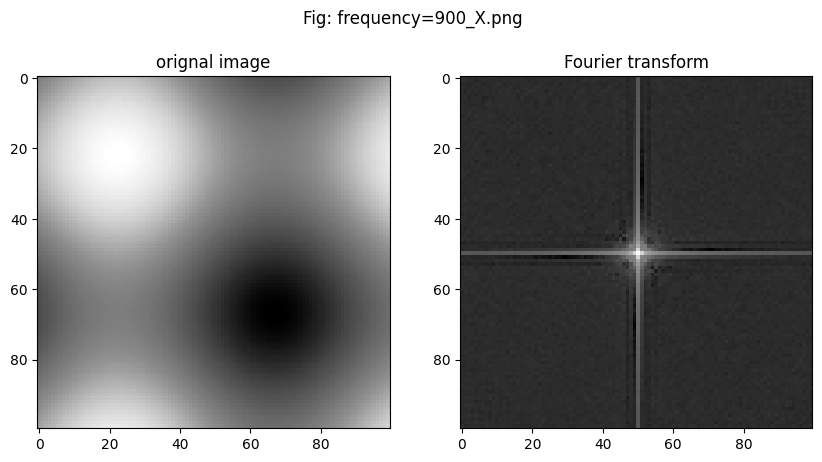

In [8]:
for imgin in images:
    show_fft(imgin)